**Welcome to the DS-610-Big-Data-Analytics Final Project**

Let's install and import required packages

In [ ]:
# install java libs and spark.
!apt update > /dev/null
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pandas==0.25.0

In [ ]:
# set environment variables for java and spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [ ]:
#Importing FindSpark
import findspark
findspark.init()

In [ ]:
# Importing SparkSession
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('final_proj').getOrCreate()

Let's first read data into RDD

In [ ]:
# Importing csv and SparkContent
import csv
from pyspark import SparkContext
sc =SparkContext.getOrCreate()

# Reading data into rdd
rdd = sc.textFile("winequality-red.csv")
rdd = rdd.mapPartitions(lambda x: csv.reader(x))

We are going to convert the RDD data into dataframe and so we will first separate the header and then transfer data into dataframe



In [ ]:
header = rdd.first()

In [ ]:
# Let's checkout our header fields to make sure we got it right
header

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [ ]:
# wine now holds entire red-wine dataset
wine = rdd.filter(lambda row : row != header).toDF(header)

In [ ]:
# let's checkout wine's schema
wine.printSchema()

root
 |-- fixed acidity: string (nullable = true)
 |-- volatile acidity: string (nullable = true)
 |-- citric acid: string (nullable = true)
 |-- residual sugar: string (nullable = true)
 |-- chlorides: string (nullable = true)
 |-- free sulfur dioxide: string (nullable = true)
 |-- total sulfur dioxide: string (nullable = true)
 |-- density: string (nullable = true)
 |-- pH: string (nullable = true)
 |-- sulphates: string (nullable = true)
 |-- alcohol: string (nullable = true)
 |-- quality: string (nullable = true)



Now let's read data into Pandas Dataframe adn do some EDA

In [ ]:
#Reading data into pandas dataframe
import pandas as pd
from matplotlib import pyplot as plt

wine=pd.read_csv('winequality-red.csv')






In [ ]:
# Let's take a look at our data
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Let's look at how correlated our data is with wine quality
wine.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

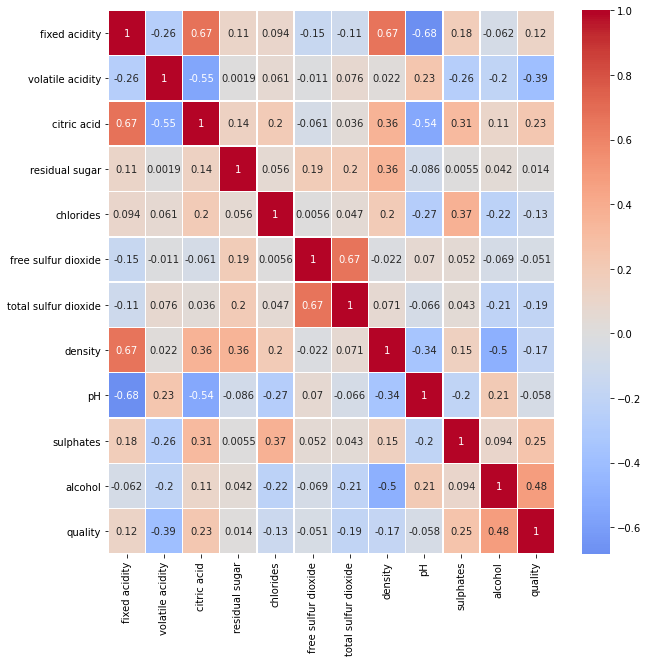

In [ ]:
# Let's look at the heatmap correlation matrix
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

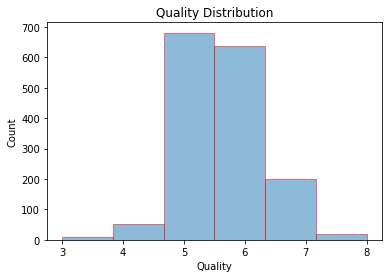

In [ ]:
# Let's see how the quality is distributed across the dataset

plt.hist(wine.quality,bins=6,alpha=0.5,histtype='bar',ec='red')
plt.title('Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

Seems like quality distribution lies mostly around 5 and 6 count.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


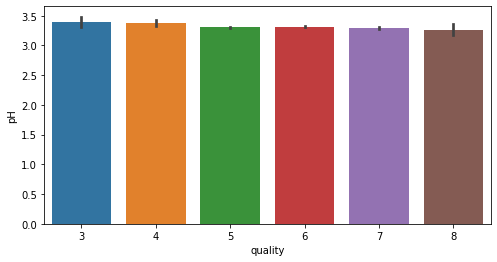

In [ ]:
# Let's compare wine quality with different categories
plt.figure(figsize=(8,4))
sns.barplot(wine['quality'],wine['pH'],palette="tab10")
plt.show()

From the above barplot, it seems like there is a slight decrease in pH with the increase in quality of the wine.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


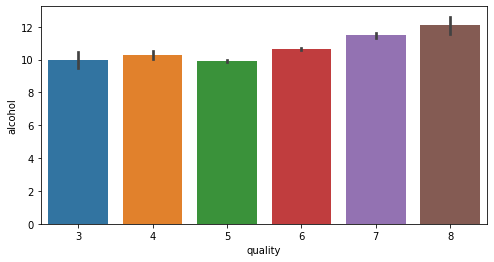

In [ ]:
# Let's compare wine quality with different categories
plt.figure(figsize=(8,4))
sns.barplot(wine['quality'],wine['alcohol'],palette="tab10")
plt.show()

From the above barplot, it seems like there is increase in quality of wine with increase in alcohol.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


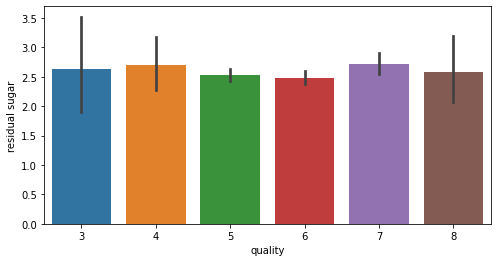

In [ ]:
# Let's compare wine quality with different categories
plt.figure(figsize=(8,4))
sns.barplot(wine['quality'],wine['residual sugar'],palette="tab10")
plt.show()

From the above barplot, we can't say much about the effect of residual sugar on quality

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


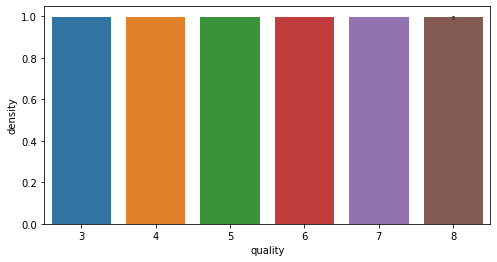

In [ ]:
# Let's compare wine quality with different categories
plt.figure(figsize=(8,4))
sns.barplot(wine['quality'],wine['density'],palette="tab10")
plt.show()

From the above graph, we don't see much effect of density on the wine either

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


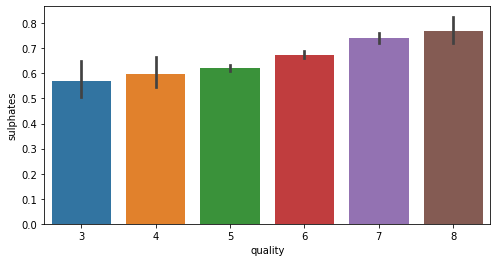

In [ ]:
# Let's compare wine quality with different categories
plt.figure(figsize=(8,4))
sns.barplot(wine['quality'],wine['sulphates'],palette="tab10")
plt.show()

From the above graph, we can say that the quality of wine increases with increase in sulphates in the wine

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


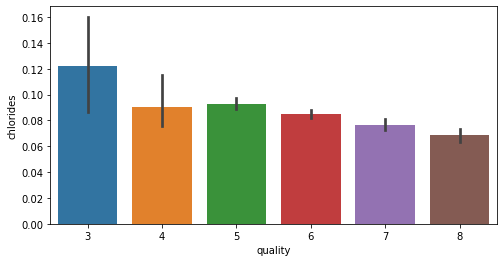

In [ ]:
# Let's compare wine quality with different categories
plt.figure(figsize=(8,4))
sns.barplot(wine['quality'],wine['chlorides'],palette="tab10")
plt.show()

From the above graph we can see that the quality of wine decreases with increase in chlorides

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


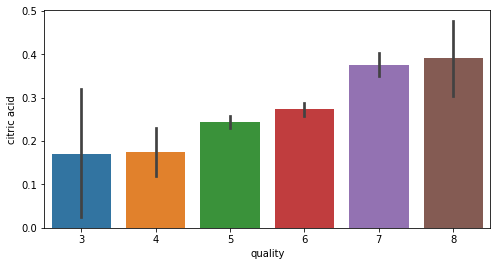

In [ ]:
# Let's compare wine quality with different categories
plt.figure(figsize=(8,4))
sns.barplot(wine['quality'],wine['citric acid'],palette="tab10")
plt.show()

From the above graph we can see that the quality of wine increases with increase in citric acid

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


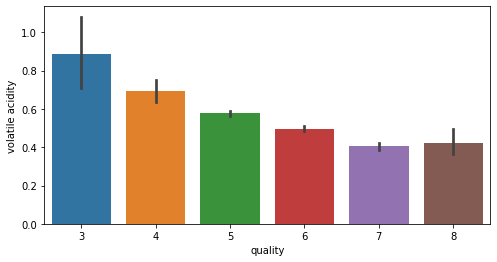

In [ ]:
# Let's compare wine quality with different categories
plt.figure(figsize=(8,4))
sns.barplot(wine['quality'],wine['volatile acidity'],palette="tab10")
plt.show()

From the above boxplot we can see that the quality of wine decreases with the increase in volatile acids.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


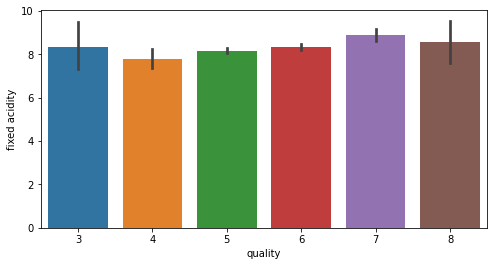

In [ ]:
# Let's compare wine quality with different categories
plt.figure(figsize=(8,4))
sns.barplot(wine['quality'],wine['fixed acidity'],palette="tab10")
plt.show()

From the above graph, fixed acidity doesn't seem to have much effect on quality of wine.

We first read data into RDD, then converted it into dataframe, then read it in pandas and did exploratory analysis. Alright now let's read the data directly into spark dataframe

In [ ]:
# reading the dataset into dataframe
wine=spark.read.csv('winequality-red.csv',inferSchema=True,header=True)

In [ ]:
# getting row anc column count
print((wine.count(),len(wine.columns)))

(1599, 12)


In [ ]:
# getting schema
wine.printSchema()

root
 |-- fixed acidity: double (nullable = true)
 |-- volatile acidity: double (nullable = true)
 |-- citric acid: double (nullable = true)
 |-- residual sugar: double (nullable = true)
 |-- chlorides: double (nullable = true)
 |-- free sulfur dioxide: double (nullable = true)
 |-- total sulfur dioxide: double (nullable = true)
 |-- density: double (nullable = true)
 |-- pH: double (nullable = true)
 |-- sulphates: double (nullable = true)
 |-- alcohol: double (nullable = true)
 |-- quality: integer (nullable = true)



In [ ]:
# Lets looks at 'quality' column
wine.groupBy('quality').count().show()

+-------+-----+
|quality|count|
+-------+-----+
|      6|  638|
|      3|   10|
|      5|  681|
|      4|   53|
|      8|   18|
|      7|  199|
+-------+-----+



In order to convert quality into a categorical variable, let's assume the quality values 6,7,8 as measure good quality of wine and quality values 3,4,5 as not good quality.

# We are going to create a new variable 'good quality' based on above mentioned plan and then we will remove the column 'quality' from our dataframe as we will no longer need it. 

In [ ]:
# Creating a new column 'good quality'
wine = wine.withColumn('good_quality', wine.quality>5)

In [ ]:
wine.groupBy('good_quality').count().show()

+------------+-----+
|good_quality|count|
+------------+-----+
|        true|  855|
|       false|  744|
+------------+-----+



In [ ]:
# now let's convert the boolean true false into 0 and 1
import pyspark.sql.functions as F

wine = wine.withColumn( "good_quality" , F.when( F.col("good_quality") , F.lit(1) ).otherwise(0) )

In [ ]:
# Alrigth let's check our new categorical column
wine.groupBy('good_quality').count().show()

+------------+-----+
|good_quality|count|
+------------+-----+
|           1|  855|
|           0|  744|
+------------+-----+



In [ ]:
# Let's again look at our schema
wine.printSchema()

root
 |-- fixed acidity: double (nullable = true)
 |-- volatile acidity: double (nullable = true)
 |-- citric acid: double (nullable = true)
 |-- residual sugar: double (nullable = true)
 |-- chlorides: double (nullable = true)
 |-- free sulfur dioxide: double (nullable = true)
 |-- total sulfur dioxide: double (nullable = true)
 |-- density: double (nullable = true)
 |-- pH: double (nullable = true)
 |-- sulphates: double (nullable = true)
 |-- alcohol: double (nullable = true)
 |-- quality: integer (nullable = true)
 |-- good_quality: integer (nullable = false)



Totally unrelated SQL querying with the data

In [ ]:
wine.createOrReplaceTempView("DATA")
spark.sql("SELECT * FROM DATA where alcohol > 10").show()

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+------------+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|good_quality|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+------------+
|          7.5|             0.5|       0.36|           6.1|    0.071|               17.0|               102.0| 0.9978|3.35|      0.8|   10.5|      5|           0|
|          7.5|             0.5|       0.36|           6.1|    0.071|               17.0|               102.0| 0.9978|3.35|      0.8|   10.5|      5|           0|
|          8.5|            0.28|       0.56|           1.8|    0.092|               35.0|               103.0| 0.9969| 3.3|     0.75|   10.5|      7|           1|
|          6.7|       

In [ ]:
# Alrigth since we no longer need 'quality' column, let's drop it
wine = wine.drop('quality')

In [ ]:
# Let's print the schema again to make sure 'quality' isn't there
wine.printSchema()

root
 |-- fixed acidity: double (nullable = true)
 |-- volatile acidity: double (nullable = true)
 |-- citric acid: double (nullable = true)
 |-- residual sugar: double (nullable = true)
 |-- chlorides: double (nullable = true)
 |-- free sulfur dioxide: double (nullable = true)
 |-- total sulfur dioxide: double (nullable = true)
 |-- density: double (nullable = true)
 |-- pH: double (nullable = true)
 |-- sulphates: double (nullable = true)
 |-- alcohol: double (nullable = true)
 |-- good_quality: integer (nullable = false)



In [ ]:
# now lets take a look at our dataset
wine.show(5)

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+------------+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|good_quality|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+------------+
|          7.4|             0.7|        0.0|           1.9|    0.076|               11.0|                34.0| 0.9978|3.51|     0.56|    9.4|           0|
|          7.8|            0.88|        0.0|           2.6|    0.098|               25.0|                67.0| 0.9968| 3.2|     0.68|    9.8|           0|
|          7.8|            0.76|       0.04|           2.3|    0.092|               15.0|                54.0|  0.997|3.26|     0.65|    9.8|           0|
|         11.2|            0.28|       0.56|           1.9|    0.075| 

In [ ]:
# We can also convert the data back into RDD but we really don't need it so this block of code is useless
rdd = wine.rdd
rdd.glom()

PythonRDD[272] at RDD at PythonRDD.scala:53

In [ ]:
# Let's look at our data summary
wine.describe().select('summary','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol').show()

+-------+------------------+-------------------+-------------------+------------------+--------------------+-------------------+--------------------+--------------------+-------------------+------------------+------------------+
|summary|     fixed acidity|   volatile acidity|        citric acid|    residual sugar|           chlorides|free sulfur dioxide|total sulfur dioxide|             density|                 pH|         sulphates|           alcohol|
+-------+------------------+-------------------+-------------------+------------------+--------------------+-------------------+--------------------+--------------------+-------------------+------------------+------------------+
|  count|              1599|               1599|               1599|              1599|                1599|               1599|                1599|                1599|               1599|              1599|              1599|
|   mean| 8.319637273295838| 0.5278205128205131| 0.2709756097560964|2.53880550343965

In [ ]:
# Let's do a group by on 'good_quality' column
wine.groupBy('good_quality').count().show()

+------------+-----+
|good_quality|count|
+------------+-----+
|           1|  855|
|           0|  744|
+------------+-----+



In [ ]:
# we can also compare different category columns with good_quality column to do more EDA but I think we have already done enough EDA so let's do just this one
wine.groupBy('volatile acidity','good_quality').count().orderBy('volatile acidity','good_quality','count',ascending=True).show()

+----------------+------------+-----+
|volatile acidity|good_quality|count|
+----------------+------------+-----+
|            0.12|           1|    3|
|            0.16|           1|    2|
|            0.18|           0|    2|
|            0.18|           1|    8|
|            0.19|           0|    1|
|            0.19|           1|    1|
|             0.2|           0|    1|
|             0.2|           1|    2|
|            0.21|           0|    1|
|            0.21|           1|    5|
|            0.22|           1|    6|
|            0.23|           0|    2|
|            0.23|           1|    3|
|            0.24|           0|    2|
|            0.24|           1|   11|
|            0.25|           1|    7|
|            0.26|           0|    2|
|            0.26|           1|   14|
|            0.27|           0|    1|
|            0.27|           1|   13|
+----------------+------------+-----+
only showing top 20 rows



In [ ]:
# Let's get the mean of our categorical column
wine.groupBy('good_quality').mean().show()

+------------+------------------+---------------------+-------------------+-------------------+-------------------+------------------------+-------------------------+------------------+------------------+------------------+------------------+-----------------+
|good_quality|avg(fixed acidity)|avg(volatile acidity)|   avg(citric acid)|avg(residual sugar)|     avg(chlorides)|avg(free sulfur dioxide)|avg(total sulfur dioxide)|      avg(density)|           avg(pH)|    avg(sulphates)|      avg(alcohol)|avg(good_quality)|
+------------+------------------+---------------------+-------------------+-------------------+-------------------+------------------------+-------------------------+------------------+------------------+------------------+------------------+-----------------+
|           1| 8.474035087719294|     0.47414619883041|0.29988304093567264|  2.535964912280701|0.08266081871345021|       15.27251461988304|        39.35204678362573|0.9964666432748543|3.3106432748538075|0.69261988304

Now Let's do some machine learning. We are going to use DecisionTree Classifier adn Random Forest Classifier. We are going to divide our data into training and Testing dataset and the we will use machine learning algorithms to predict output values. And then we will also check which model is more accurate.

In [ ]:
# Importing VectorAssembler
from pyspark.ml.feature import VectorAssembler

In [ ]:
'''
# Transforming data using vector assember
wine_assembler = VectorAssembler(inputCols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',  'pH', 'sulphates', 'alcohol'], outputCol="features")
wine = wine_assembler.transform(wine)
'''

'\n# Transforming data using vector assember\nwine_assembler = VectorAssembler(inputCols=[\'fixed acidity\', \'volatile acidity\', \'citric acid\', \'residual sugar\', \'chlorides\', \'free sulfur dioxide\', \'total sulfur dioxide\', \'density\',  \'pH\', \'sulphates\', \'alcohol\'], outputCol="features")\nwine = wine_assembler.transform(wine)\n'

In [ ]:

# Transforming data using vector assember
wine_assembler = VectorAssembler(inputCols=['citric acid', 'sulphates', 'alcohol'], outputCol="features")
wine = wine_assembler.transform(wine)


In [ ]:
# Let's print the schema
wine.printSchema()

root
 |-- fixed acidity: double (nullable = true)
 |-- volatile acidity: double (nullable = true)
 |-- citric acid: double (nullable = true)
 |-- residual sugar: double (nullable = true)
 |-- chlorides: double (nullable = true)
 |-- free sulfur dioxide: double (nullable = true)
 |-- total sulfur dioxide: double (nullable = true)
 |-- density: double (nullable = true)
 |-- pH: double (nullable = true)
 |-- sulphates: double (nullable = true)
 |-- alcohol: double (nullable = true)
 |-- good_quality: integer (nullable = false)
 |-- features: vector (nullable = true)



In [ ]:
# let's select data for building model
model_data=wine.select(['features','good_quality'])

In [ ]:
# we will divide training and testing dataset into 75:25 ratio
train_data,test_data=model_data.randomSplit([0.75,0.25])

In [ ]:
train_data.count(), test_data.count()

(1212, 387)

In [ ]:
# Let's look at our training dataset
train_data.groupBy('good_quality').count().show()

+------------+-----+
|good_quality|count|
+------------+-----+
|           1|  650|
|           0|  562|
+------------+-----+



In [ ]:
# let's look at our testing dataset
test_data.groupBy('good_quality').count().show()

+------------+-----+
|good_quality|count|
+------------+-----+
|           1|  205|
|           0|  182|
+------------+-----+



In [ ]:
# We will first start with decision tree classifier
from pyspark.ml.classification import DecisionTreeClassifier

In [ ]:
dtree_classifier=DecisionTreeClassifier(labelCol='good_quality').fit(train_data)

In [ ]:
# transforming the testing data 
dtree_predictions=dtree_classifier.transform(test_data)

Let's look at the predictions

In [ ]:
dtree_predictions.show()

+---------------+------------+-------------+--------------------+----------+
|       features|good_quality|rawPrediction|         probability|prediction|
+---------------+------------+-------------+--------------------+----------+
| [0.0,0.4,10.9]|           0|  [23.0,10.0]|[0.69696969696969...|       0.0|
|[0.0,0.44,11.9]|           1|    [2.0,8.0]|           [0.2,0.8]|       1.0|
| [0.0,0.45,9.4]|           0| [119.0,16.0]|[0.88148148148148...|       0.0|
| [0.0,0.45,9.5]|           0| [119.0,16.0]|[0.88148148148148...|       0.0|
| [0.0,0.45,9.5]|           0| [119.0,16.0]|[0.88148148148148...|       0.0|
| [0.0,0.45,9.5]|           0| [119.0,16.0]|[0.88148148148148...|       0.0|
|[0.0,0.52,10.8]|           0| [92.0,157.0]|[0.36947791164658...|       1.0|
|[0.0,0.53,11.2]|           0| [92.0,157.0]|[0.36947791164658...|       1.0|
| [0.0,0.54,9.4]|           0|  [60.0,15.0]|           [0.8,0.2]|       0.0|
| [0.0,0.55,9.7]|           0|  [60.0,15.0]|           [0.8,0.2]|       0.0|

In [ ]:
dtree_predictions.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|  173|
|       1.0|  214|
+----------+-----+



In [ ]:
# lets look at predictions side by side with probability adn good_quality
dtree_predictions.select(['probability','good_quality','prediction']).show(5,False)

+----------------------------------------+------------+----------+
|probability                             |good_quality|prediction|
+----------------------------------------+------------+----------+
|[0.696969696969697,0.30303030303030304] |0           |0.0       |
|[0.2,0.8]                               |1           |1.0       |
|[0.8814814814814815,0.11851851851851852]|0           |0.0       |
|[0.8814814814814815,0.11851851851851852]|0           |0.0       |
|[0.8814814814814815,0.11851851851851852]|0           |0.0       |
+----------------------------------------+------------+----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
# lets check the accuracy of our model
dtree_accuracy=MulticlassClassificationEvaluator(labelCol='good_quality',metricName='accuracy').evaluate(dtree_predictions)

In [ ]:
print('The accuracy of our decision tree model on test data is {0:.0%}'.format(dtree_accuracy))

The accuracy of our decision tree model on test data is 72%


Now lets try random forest classifier and repeat same steps 

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
rf_classifier=RandomForestClassifier(labelCol='good_quality',numTrees=40).fit(train_data)

In [ ]:
rf_predictions=rf_classifier.transform(test_data)

Now let's look at random forest predictions

In [ ]:
rf_predictions.show(5, False)

+---------------+------------+---------------------------------------+----------------------------------------+----------+
|features       |good_quality|rawPrediction                          |probability                             |prediction|
+---------------+------------+---------------------------------------+----------------------------------------+----------+
|[0.0,0.4,10.9] |0           |[29.1831190457341,10.816880954265894]  |[0.7295779761433526,0.2704220238566474] |0.0       |
|[0.0,0.44,11.9]|1           |[16.016846763317776,23.983153236682224]|[0.4004211690829444,0.5995788309170555] |1.0       |
|[0.0,0.45,9.4] |0           |[35.014537473568026,4.9854625264319745]|[0.8753634368392007,0.12463656316079937]|0.0       |
|[0.0,0.45,9.5] |0           |[35.014537473568026,4.9854625264319745]|[0.8753634368392007,0.12463656316079937]|0.0       |
|[0.0,0.45,9.5] |0           |[35.014537473568026,4.9854625264319745]|[0.8753634368392007,0.12463656316079937]|0.0       |
+---------------

In [ ]:
rf_predictions.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|  183|
|       1.0|  204|
+----------+-----+



In [ ]:
rf_predictions.select(['probability','good_quality','prediction']).show(5,False)

+----------------------------------------+------------+----------+
|probability                             |good_quality|prediction|
+----------------------------------------+------------+----------+
|[0.7295779761433526,0.2704220238566474] |0           |0.0       |
|[0.4004211690829444,0.5995788309170555] |1           |1.0       |
|[0.8753634368392007,0.12463656316079937]|0           |0.0       |
|[0.8753634368392007,0.12463656316079937]|0           |0.0       |
|[0.8753634368392007,0.12463656316079937]|0           |0.0       |
+----------------------------------------+------------+----------+
only showing top 5 rows



Now let's check out the accuracy with random forest classifer 

In [ ]:
rf_accuracy=MulticlassClassificationEvaluator(labelCol='good_quality',metricName='accuracy').evaluate(rf_predictions)

In [ ]:
print('The accuracy of our random forest model on test data is {0:.0%}'.format(rf_accuracy))

The accuracy of our random forest model on test data is 78%


Conclusion: With the current model, random forest classifier gives the better model with 78% accuracy as compared to 72% accuracy with decision tree classifier